This Code will explore the .nc data from Axial Fetch

In [57]:
# Import necessary libraries
import xarray as xr
import pandas as pd
import netCDF4 as nc
import numpy as np

In [2]:
cd /Users/earthnote/Desktop/AZA/2022/9

/Users/earthnote/Desktop/AZA/2022/9


In [3]:
ls

2022-09-01.local.nc*  2022-09-07.local.nc*  2022-09-19.local.nc*
2022-09-01.remote.nc* 2022-09-08.local.nc*  2022-09-20.local.nc*
2022-09-02.local.nc*  2022-09-09.local.nc*  2022-09-21.local.nc*
2022-09-02.remote.nc* 2022-09-10.local.nc*  2022-09-22.local.nc*
2022-09-03.local.nc*  2022-09-11.local.nc*  2022-09-23.local.nc*
2022-09-03.remote.nc* 2022-09-12.local.nc*  2022-09-24.local.nc*
2022-09-04.local.nc*  2022-09-13.local.nc*  2022-09-25.local.nc*
2022-09-04.remote.nc* 2022-09-14.local.nc*  2022-09-26.local.nc*
2022-09-05.local.nc*  2022-09-15.local.nc*  2022-09-27.local.nc*
2022-09-05.remote.nc* 2022-09-16.local.nc*  2022-09-28.local.nc*
2022-09-06.local.nc*  2022-09-17.local.nc*  2022-09-29.local.nc*
2022-09-06.remote.nc* 2022-09-18.local.nc*  2022-09-30.local.nc*


In [ ]:
# Open the .nc file
dataset = nc.Dataset('2022-09-02.remote.nc')
address = dataset.variables['address'][:]
time = dataset.variables['time'][:]

In [ ]:
if 'address' in dataset.variables:
    print("The dataset has the 'address' variable.")

    # Number of time points associated with each address
    time_points_per_address = len(time)

    
    variables = ['pitch', 'roll', 'temperature', 'sound_velocity', 'pressure', 'secondary_pressure', 
                  'range_delay', 'turn_around_time', 'sens_response_timestamp', 'si_response_timestamp', 'cs_response_timestamp']
    
    
    # Create a dictionary of DataFrames, one for each address
    dfs = {}
    # Extract the variables
    pitch = dataset.variables['pitch'][:]
    roll = dataset.variables['roll'][:]
    temperature = dataset.variables['temperature'][:]
    sound_velocity = dataset.variables['sound_velocity'][:]
    pressure = dataset.variables['pressure'][:]
    secondary_pressure = dataset.variables['secondary_pressure'][:]
    range_delay = dataset.variables['range_delay'][:]
    turn_around_time = dataset.variables['turn_around_time'][:]
    sens_response_timestamp = dataset.variables['sens_response_timestamp'][:]
    si_response_timestamp = dataset.variables['si_response_timestamp'][:]
    cs_response_timestamp = dataset.variables['cs_response_timestamp'][:]

    for i, addr in enumerate(address):
        df_addr = pd.DataFrame({
            'address': addr,
            'time': time.data,
            'pitch': pitch.data[i],
            'roll': roll.data[i],
            'temperature': temperature.data[i],
            'sound_velocity': sound_velocity.data[i],
            'pressure': pressure.data[i],
            'secondary_pressure': secondary_pressure.data[i],
            'range_delay0': range_delay.data[i][0],
            'range_delay1': range_delay.data[i][1],
            'range_delay2': range_delay.data[i][2],
            'range_delay3': range_delay.data[i][3],
            'turn_around_time': turn_around_time.data[i],
            'sens_response_timestamp': sens_response_timestamp.data[i],
            'si_response_timestamp': si_response_timestamp.data[i],
            'cs_response_timestamp': cs_response_timestamp.data[i]
        })
        dfs[addr] = df_addr
        
else:

    print("The dataset does not have the 'address' variable.")
    # Create a dictionary to hold the data
    data = {}
    # Loop over all variables
    for var in dataset.variables:
        data[var] = dataset.variables[var][:]

    # Create the DataFrame
    df = pd.DataFrame(data)

In [ ]:
dfs[2504]

In [52]:
# Open the .nc file
dataset = nc.Dataset('2022-09-03.remote.nc')

if 'address' in dataset.variables:
    print("The dataset has the 'address' variable.")

    # Number of time points associated with each address
    time_points_per_address = len(dataset.variables['time'][:])

    # Extract the variables
    address = dataset.variables['address'][:]
    time = dataset.variables['time'][:]
    sound_velocity = dataset.variables['sound_velocity'][:]
    range_delay = dataset.variables['range_delay'][:]
    turn_around_time = dataset.variables['turn_around_time'][:]

    # Create a dictionary of DataFrames, one for each address
    dfs = {}
    for i, addr in enumerate(address):
        df_addr = pd.DataFrame({
            'address': addr,
            'time': time,
            'sound_velocity': sound_velocity[i],
            'range_delay0': range_delay[i][0],
            'range_delay1': range_delay[i][1],
            'range_delay2': range_delay[i][2],
            'range_delay3': range_delay[i][3],
            'turn_around_time': turn_around_time[i],
        })

        # Replace high outliers with NaN in 'sound_velocity' column
        df_addr['sound_velocity'] = df_addr['sound_velocity'].replace(9999.000, np.nan)

        # Interpolate the 'sound_velocity' column
        df_addr['sound_velocity'] = df_addr['sound_velocity'].interpolate()

        fill_value = 9.969210e+36
        for j in range(4):
            total_time_s = df_addr[f'range_delay{j}'] * 1e-6 - df_addr['turn_around_time'] * 1e-3
            df_addr[f'distance{j}'] = np.where((total_time_s * 1e6 == fill_value) | (df_addr[f'range_delay{j}'] == 0) | np.isnan(df_addr[f'range_delay{j}']), np.nan, total_time_s / 2 * df_addr['sound_velocity'])

        dfs[addr] = df_addr
else:
    print("The dataset does not have the 'address' variable.")
    # Create a dictionary to hold the data
    data = {}
    # Loop over all variables
    for var in dataset.variables:
        data[var] = dataset.variables[var][:]

    # Create the DataFrame
    df = pd.DataFrame(data)


The dataset has the 'address' variable.


In [53]:
dfs[2501]

,address,time,sound_velocity,range_delay0,range_delay1,range_delay2,range_delay3,turn_around_time,distance0,distance1,distance2,distance3
0,2501,1662163213,1484.584000,NaN,2376998.0,2425064.0,966467.0,80.0,NaN,1705.043239,1740.722247,658.017362
1,2501,1662166819,1484.583000,NaN,2376998.0,2425102.0,966473.0,80.0,NaN,1705.042091,1740.749281,658.021373
2,2501,1662166819,1484.583000,NaN,2376998.0,2425102.0,966473.0,80.0,NaN,1705.042091,1740.749281,658.021373
3,2501,1662170420,1484.580000,NaN,2376953.0,2425077.0,966475.0,80.0,NaN,1705.005242,1740.727206,658.021528
4,2501,1662170420,1484.580000,NaN,2376953.0,2425077.0,966475.0,80.0,NaN,1705.005242,1740.727206,658.021528
5,2501,1662174015,1484.564000,NaN,2376941.0,2425096.0,966476.0,80.0,NaN,1704.977959,1740.722549,658.015178
6,2501,1662177614,1484.566000,NaN,2376934.0,2425108.0,966477.0,80.0,NaN,1704.975060,1740.733802,658.016807
7,2501,1662181215,1484.577000,NaN,2376942.0,2425090.0,966475.0,80.0,NaN,1704.993632,1740.733338,658.020198
8,2501,1662184814,1484.582000,NaN,2376970.0,2425034.0,966472.0,80.0,NaN,1705.020158,1740.697633,658.020187
9,2501,1662188420,1484.575000,NaN,0.0,2424982.0,966474.0,80.0,NaN,NaN,1740.650826,658.018569


In [54]:
index = 2501
df = dfs[index]

In [55]:
# Define a function to replace outliers with NaN
def replace_outliers_with_nan(series, n_std=2):
    mean = series.mean()
    std = series.std()
    is_outlier = (series - mean).abs() > n_std * std
    series[is_outlier] = np.nan
    return series

# Get the DataFrame for address 2501
df = dfs[2501]

# Replace outliers with NaN in each distance column
for i in range(4):
    df[f'distance{i}'] = replace_outliers_with_nan(df[f'distance{i}'])

/var/folders/4v/r6b_tqkn06347qqtqshm4lhr0000gp/T/ipykernel_29661/2156807345.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[is_outlier] = np.nan
/var/folders/4v/r6b_tqkn06347qqtqshm4lhr0000gp/T/ipykernel_29661/2156807345.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[is_outlier] = np.nan
/var/folders/4v/r6b_tqkn06347qqtqshm4lhr0000gp/T/ipykernel_29661/2156807345.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

<Figure size 3000x1800 with 0 Axes>

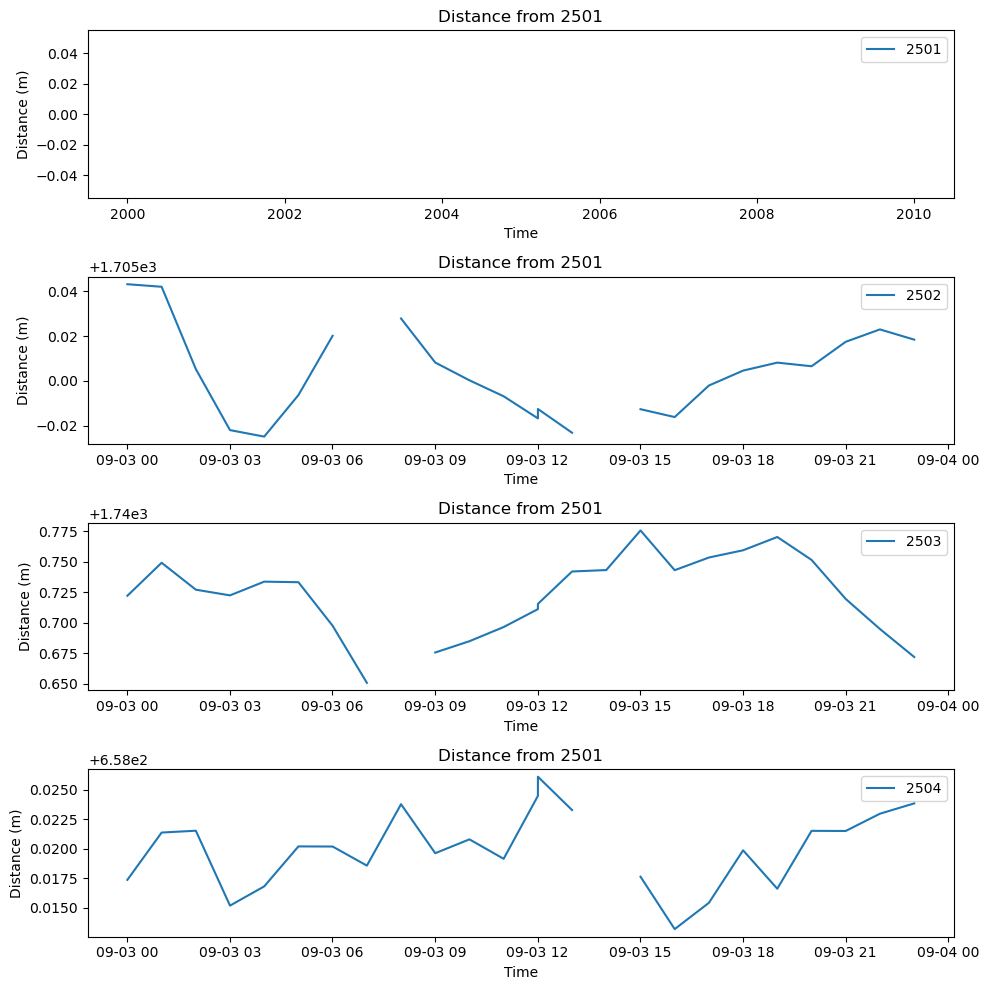

In [56]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Get the DataFrame for address 2501
#df = dfs[2501]

# Convert Unix time to datetime
df['time'] = pd.to_datetime(df['time'], unit='s')

# Create a new figure
plt.figure(figsize=(30, 18))

# Create a 4-row figure for the subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 10))

# Plot each distance on its own subplot
for i in range(4):
    axs[i].plot(df['time'], df[f'distance{i}'], label=f'{address.data[i]}')
    axs[i].set_title(f'Distance from {index}')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Distance (m)')
    axs[i].legend()

# Automatically adjust subplot parameters to give specified padding
plt.tight_layout()

# Show the plot
plt.show()